In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import gradio as gr

In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
x = df.columns.tolist()
x

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [12]:
df = df.drop(columns = (['RowNumber', 'CustomerId', 'Surname']))

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
numeric_cols = df.select_dtypes(include = 'number').columns
print(numeric_cols)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


<Axes: >

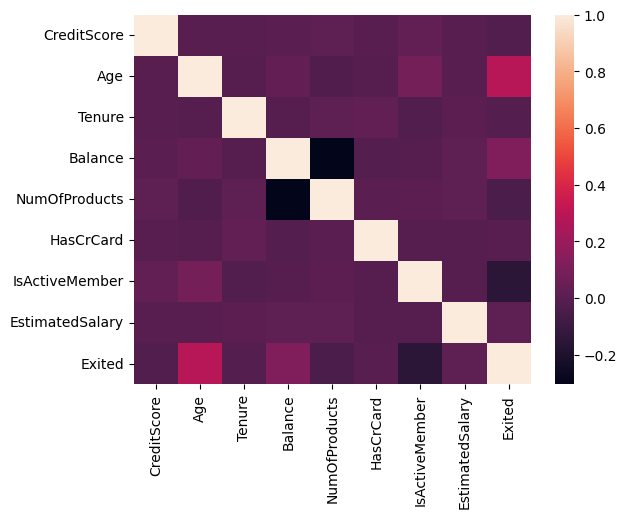

In [15]:
sns.heatmap(df[numeric_cols].corr())

<Axes: xlabel='CreditScore', ylabel='Count'>

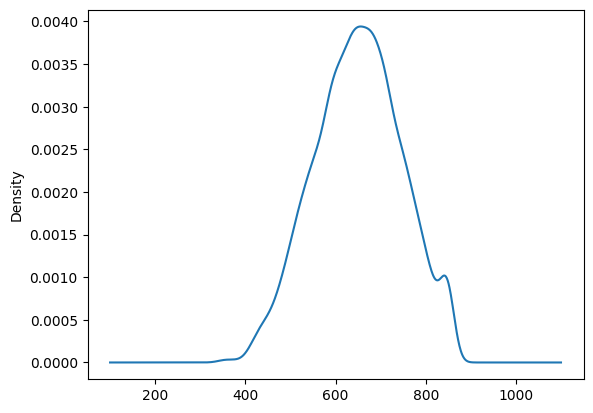

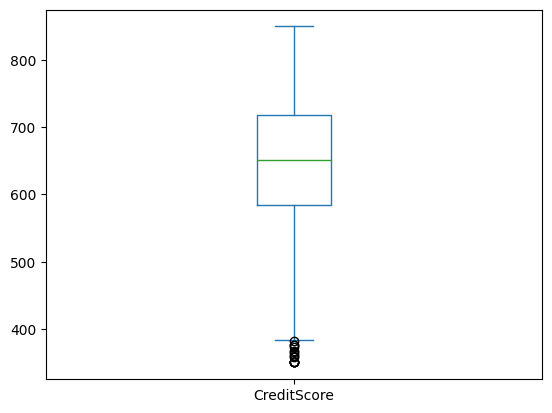

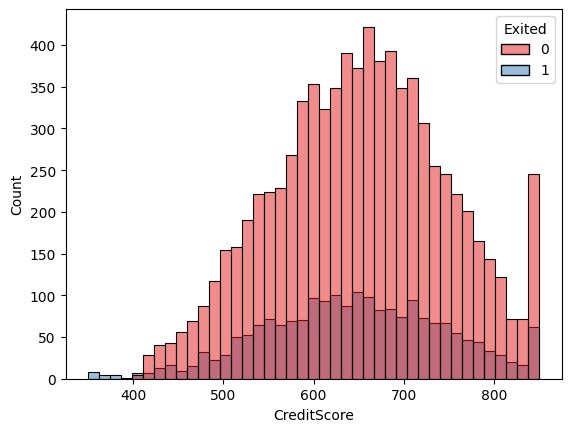

In [16]:
plt.figure()
df['CreditScore'].plot(kind = 'kde')
#plt.show()
plt.figure()
df['CreditScore'].plot(kind = 'box')
plt.figure()
sns.histplot(data=df, x='CreditScore', hue='Exited', palette='Set1', kde=False)

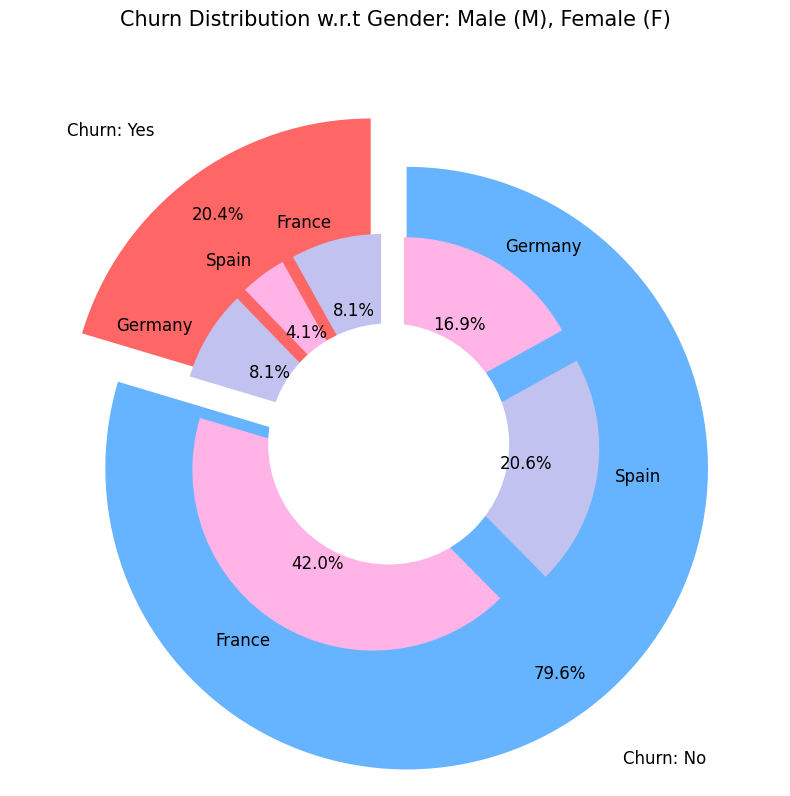

In [17]:
labels = ["Churn: Yes", "Churn: No"]
values = [len(df[df['Exited']==1]['Geography'].values), len(df[df['Exited']==0]['Geography'].values)] 
labels_gender = [df['Geography'].unique()[0], df['Geography'].unique()[1], df['Geography'].unique()[2], df['Geography'].unique()[0], df['Geography'].unique()[1], df['Geography'].unique()[2]]
sizes_gender = [len(df[(df['Geography'] == 'France') & (df['Exited'] == 1)]), 
               len(df[(df['Geography'] == 'Spain') & (df['Exited'] == 1)]), 
               len(df[(df['Geography'] == 'Germany') & (df['Exited'] == 1)]), 
               len(df[(df['Geography'] == 'France') & (df['Exited'] == 0)]), 
               len(df[(df['Geography'] == 'Spain') & (df['Exited'] == 0)]), 
               len(df[(df['Geography'] == 'Germany') & (df['Exited'] == 0)])]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.1, 0.1)
explode_gender = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 12}

# Plotting
plt.figure(figsize=(8, 8))

# Outer pie (Churn)
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.2, colors=colors, startangle=90, explode=explode, textprops=textprops)

# Inner pie (Gender)
plt.pie(sizes_gender, labels=labels_gender,autopct='%1.1f%%', colors=colors_gender, startangle=90, explode=explode_gender, radius=0.6, textprops=textprops)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.4, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male (M), Female (F)', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()

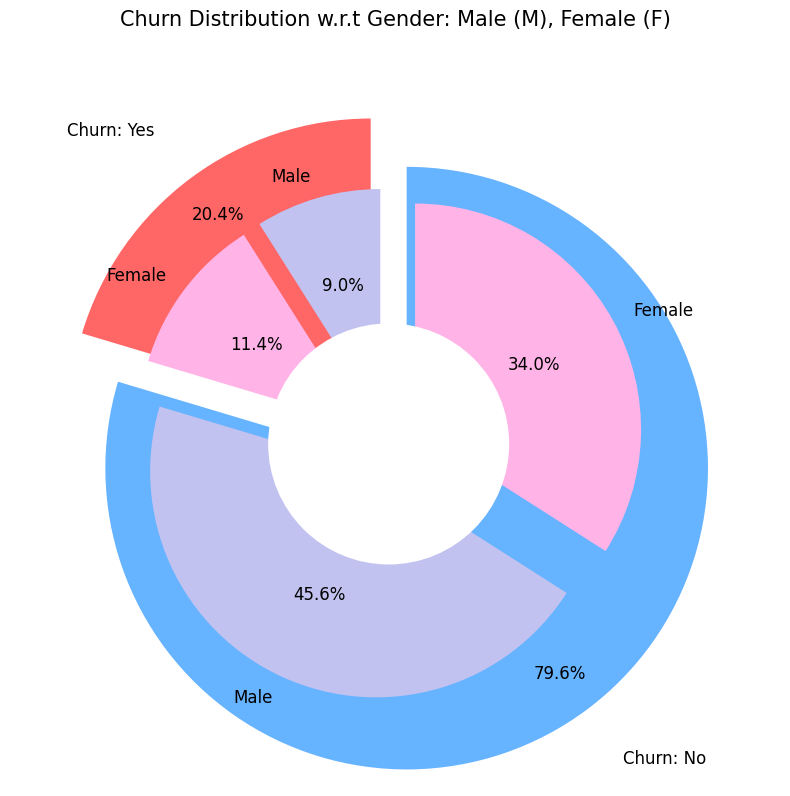

In [18]:
labels = ["Churn: Yes", "Churn: No"]
values = [len(df[df['Exited']==1]['Gender'].values), len(df[df['Exited']==0]['Gender'].values)] 
labels_gender = ['Male', 'Female', 'Male', 'Female']
sizes_gender = [len(df[(df['Gender'] == 'Male') & (df['Exited'] == 1)]), 
               len(df[(df['Gender'] == 'Female') & (df['Exited'] == 1)]), 
               len(df[(df['Gender'] == 'Male') & (df['Exited'] == 0)]), 
               len(df[(df['Gender'] == 'Female') & (df['Exited'] == 0)])]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.1, 0.1)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 12}

# Plotting
plt.figure(figsize=(8, 8))

# Outer pie (Churn)
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.2, colors=colors, startangle=90, explode=explode, textprops=textprops)

# Inner pie (Gender)
plt.pie(sizes_gender, labels=labels_gender,autopct='%1.1f%%', colors=colors_gender, startangle=90, explode=explode_gender, radius=0.75, textprops=textprops)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.4, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male (M), Female (F)', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

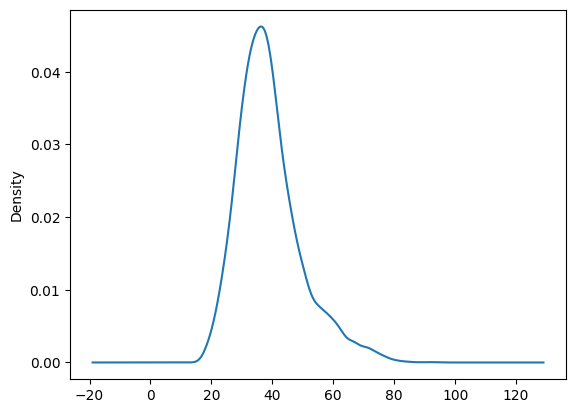

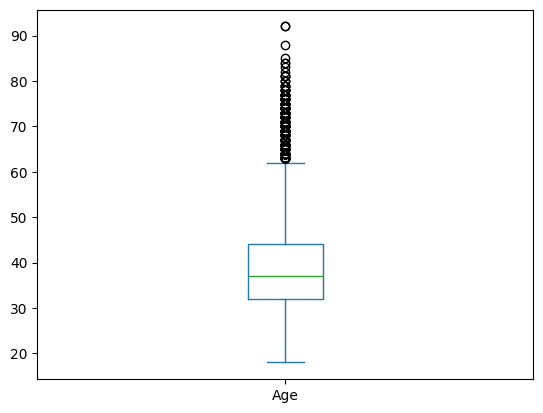

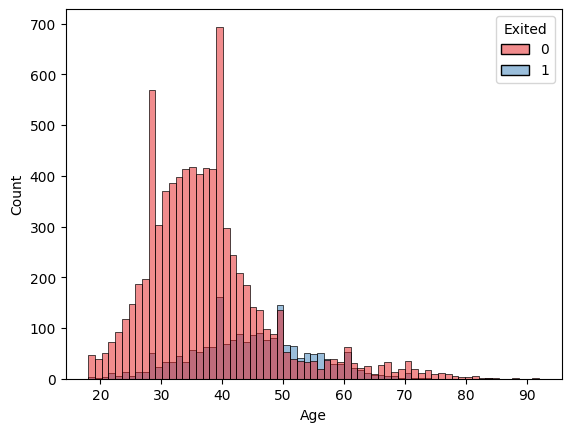

In [19]:
plt.figure()
df['Age'].plot(kind = 'kde')
#plt.show()
plt.figure()
df['Age'].plot(kind = 'box')
plt.figure()
sns.histplot(data=df, x='Age', hue='Exited', palette='Set1', kde=False)

<Axes: xlabel='Tenure', ylabel='Count'>

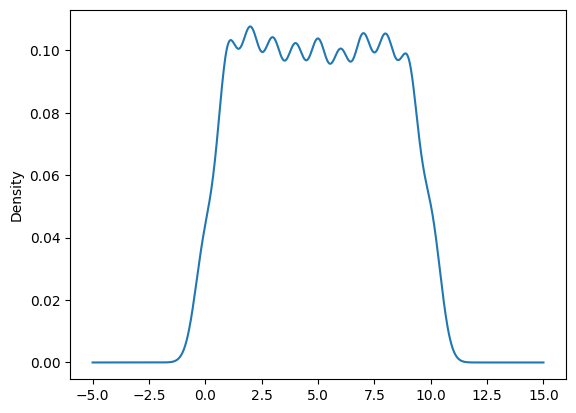

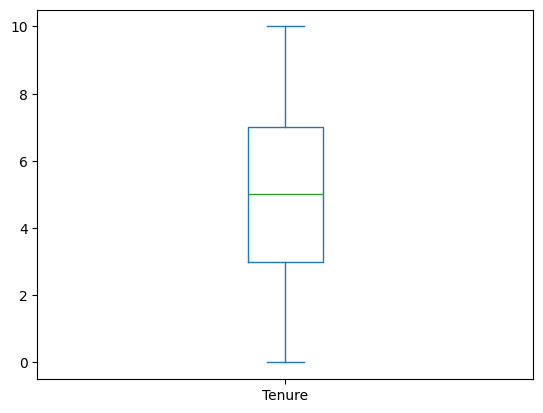

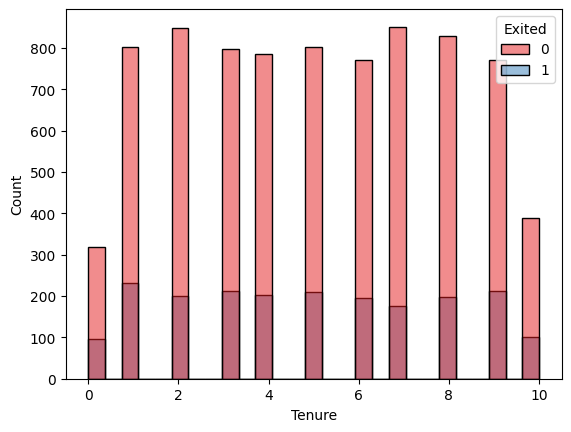

In [20]:
plt.figure()
df['Tenure'].plot(kind = 'kde')
#plt.show()
plt.figure()
df['Tenure'].plot(kind = 'box')
plt.figure()
sns.histplot(data=df, x='Tenure', hue='Exited', palette='Set1', kde=False)

<Axes: xlabel='Balance', ylabel='Count'>

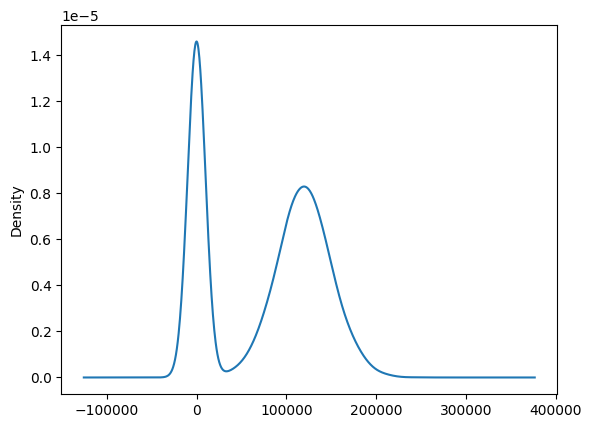

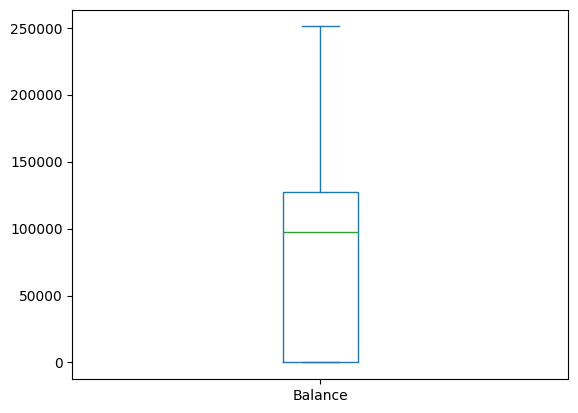

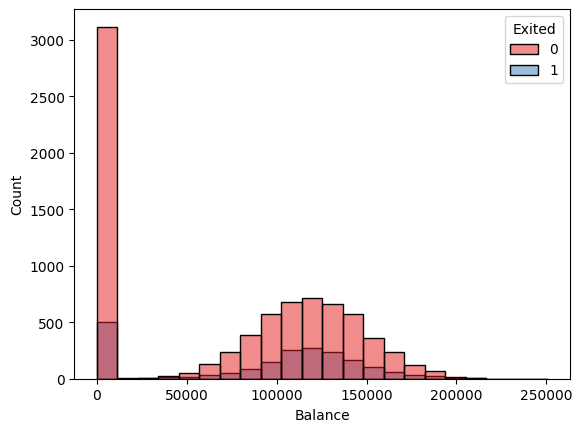

In [21]:
plt.figure()
df['Balance'].plot(kind = 'kde')
#plt.show()
plt.figure()
df['Balance'].plot(kind = 'box')
plt.figure()
sns.histplot(data=df, x='Balance', hue='Exited', palette='Set1', kde=False)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

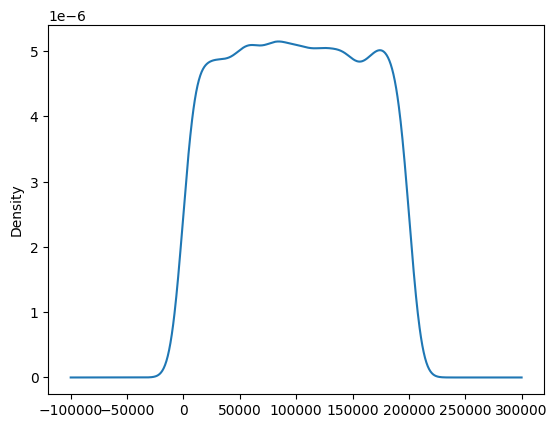

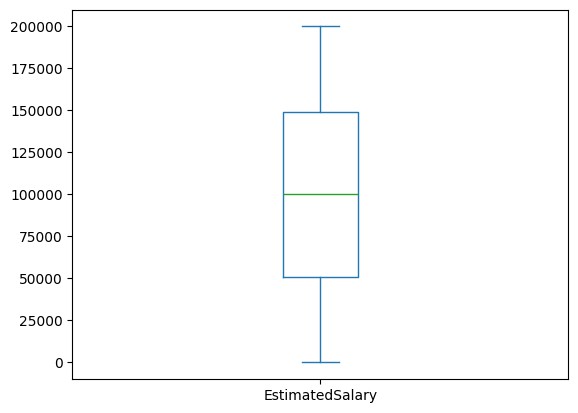

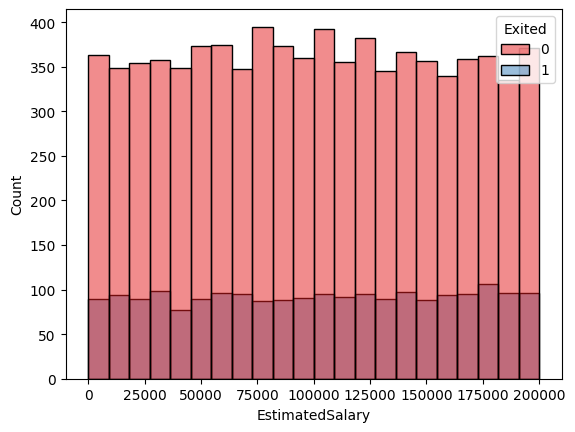

In [22]:
plt.figure()
df['EstimatedSalary'].plot(kind = 'kde')
#plt.show()
plt.figure()
df['EstimatedSalary'].plot(kind = 'box')
plt.figure()
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', palette='Set1', kde=False)

In [23]:
def obj_to_int(df):
    for column in df:
        if df[column].dtype == 'object':
            df[column] = LabelEncoder().fit_transform(df[column])
    return df

In [24]:
obj_to_int(df)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [25]:
x = df.drop(columns = ['Exited'])
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 100, stratify=y)

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
predict = model.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.8573333333333333

In [29]:
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.77      0.43      0.55       611

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



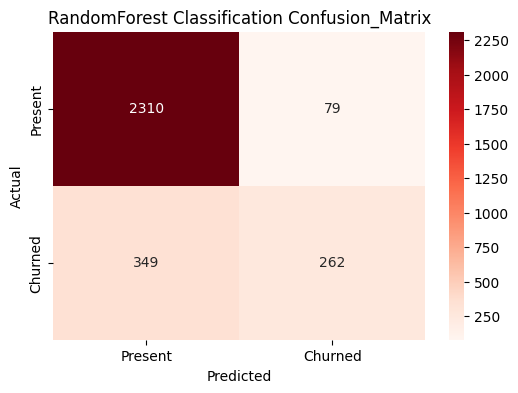

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = 'd', cmap = 'Reds', xticklabels = ['Present', 'Churned'], yticklabels = ['Present', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Classification Confusion_Matrix')
plt.show()

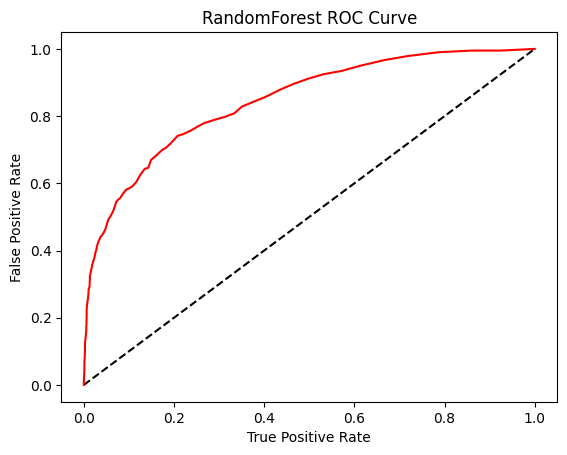

In [31]:
predict_proba = model.predict_proba(x_test)[ :,1]
fpr, tpr, thresholds = roc_curve(y_test, predict_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Random Forest', color = 'r')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('RandomForest ROC Curve')
plt.show()

In [37]:
def predict_churn(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):
    test = np.array([CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]).reshape(1, -1)
    test_df = pd.DataFrame(test, columns = x.columns)
    test_df = obj_to_int(test_df)
    prediction = model.predict(test_df)
    if prediction == 1:
        r = 'The employee will churn'
    else:
        r = 'The employee will not churn'
    return r

In [38]:
inputs = [
    gr.Number(label="CreditScore"),
    gr.Radio(['France', 'Spain', 'Germany'], label="Geography"),
    gr.Radio(['Female', 'Male'], label="Gender"),
    gr.Number(label="Age"),
    gr.Number(label="Tenure"),
    gr.Number(label="Balance"),
    gr.Number(label="NumOfProducts"),
    gr.Number(label="HasCrCard (1/0)"),
    gr.Number(label="IsActiveMember (1/0)"),
    gr.Number(label="EstimatedSalary"),
]
outputs = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_churn, inputs=inputs, outputs=outputs, title="Churn Predictor", description="Predicts whether the empolyee will churn or not").launch(share=True)

Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
